## Decision Tree & KNN

**Decision Tree**

Pros: Interpretability, Non-parametric, Non-linear, Feature Importance, Handles Mixed Data  
Cons: Overfitting, Instability, Bias (Imbalanced Data), High Dimensionality



**K-Nearest Neighbors (KNN)**

Pros: Simple, Versatile, Non-parametric  
Cons: Computationally Expensive, Sensitive to Irrelevant Features, K Selection, Memory Intensive, Curse of Dimensionality

In [40]:
# Import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier


In [41]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Display the first 5 rows of the dataset
df = pd.DataFrame(X, columns=iris.feature_names)
df['Species'] = y
print("First 5 rows of the Iris dataset:")
print(df.head())

First 5 rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [42]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[:, :2], y, test_size=0.3, random_state=42)


In [43]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='Test set')

## Decision Tree

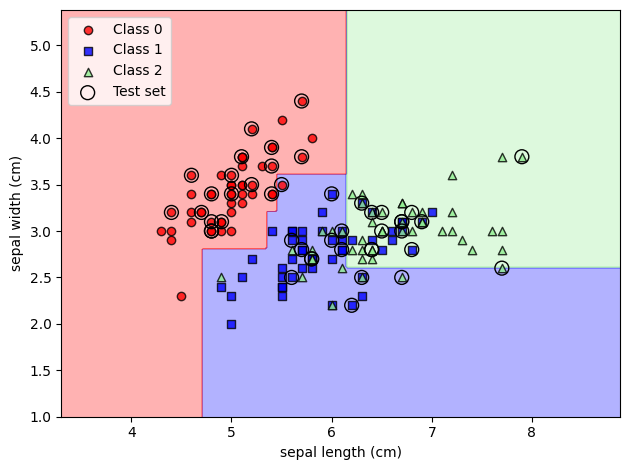

In [44]:
tree_model = DecisionTreeClassifier(criterion='gini', # criterion{“gini”, “entropy”}, default=”gini”
                                    max_depth=4, # default=None
                                    random_state=42)


tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

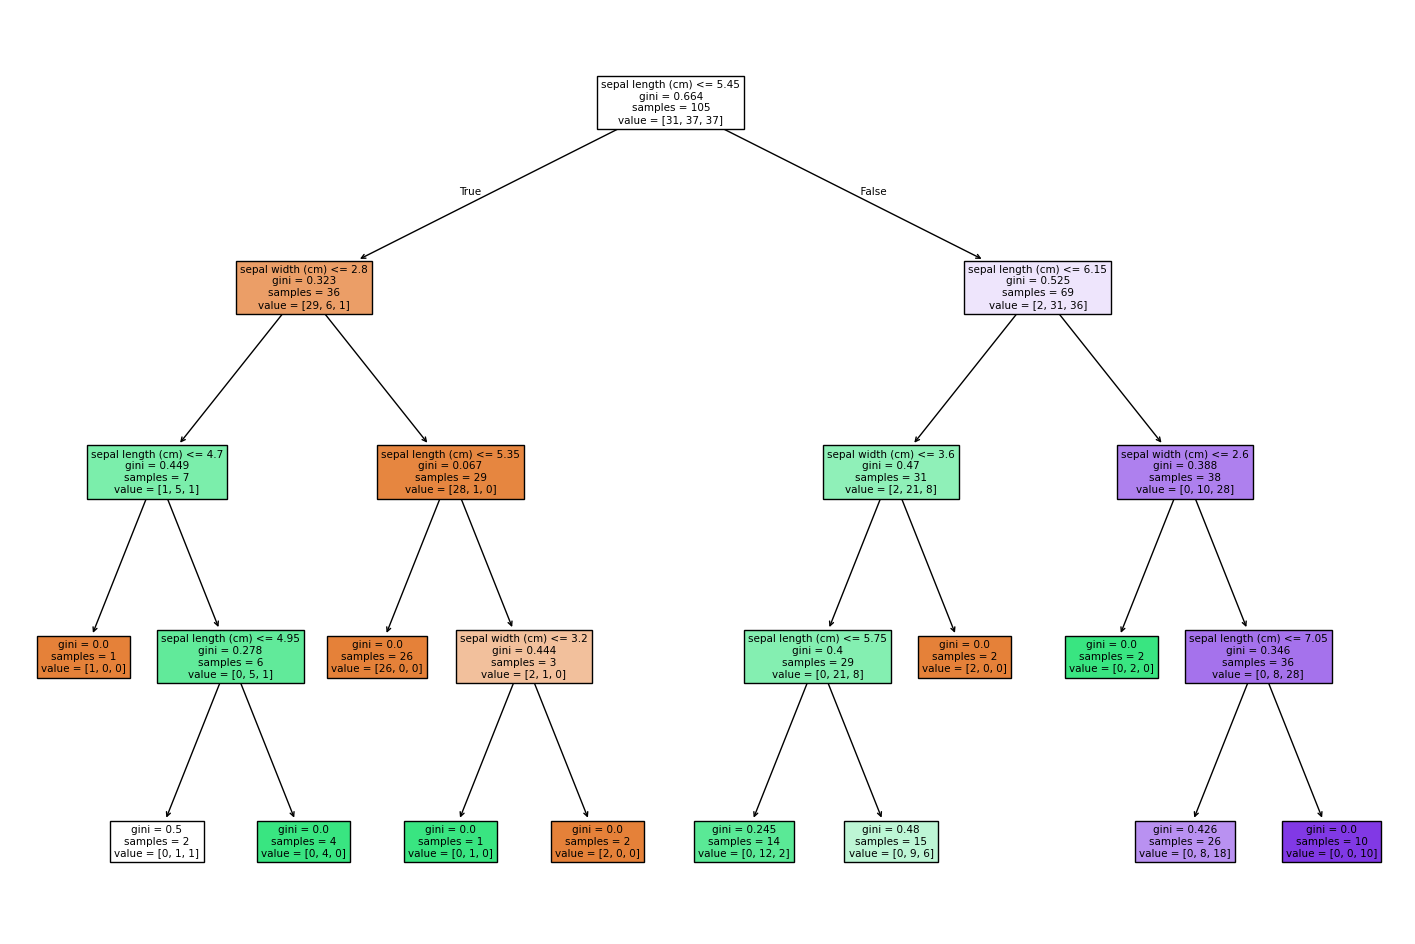

In [45]:
from sklearn import tree

# Create the figure and axes with a larger size
fig, ax = plt.subplots(figsize=(18, 12))

tree.plot_tree(tree_model,
               feature_names=iris.feature_names[0:2],
               filled=True)
plt.show()


In [46]:
# Evaluate with Classification Report
y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7555555555555555
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.57      0.62      0.59        13
           2       0.62      0.62      0.62        13

    accuracy                           0.76        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.77      0.76      0.76        45



## K Nearest Neighbor

### Example of KNN classifier


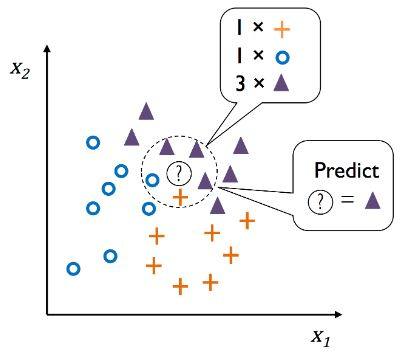

In [47]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[:, :2], y, test_size=0.3, random_state=42)

# Standardize the features (important for knn)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

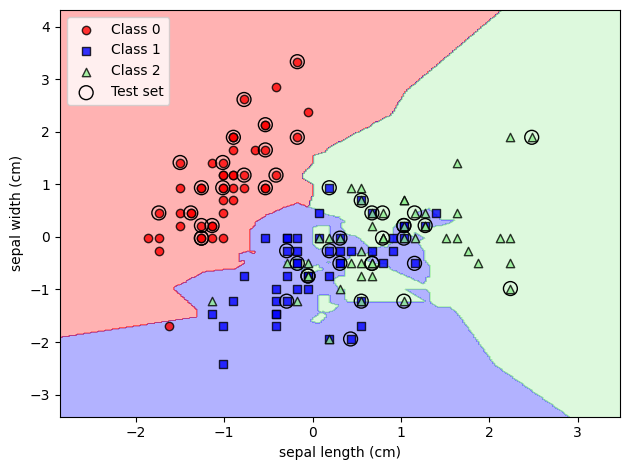

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3,
                           p=2,
                           metric='minkowski') # Default is “minkowski”, which results in the standard Euclidean distance when p = 2
knn.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined,
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [49]:
# Evaluate with Classification Report
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8444444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.80      0.62      0.70        13
           2       0.69      0.85      0.76        13

    accuracy                           0.84        45
   macro avg       0.83      0.82      0.82        45
weighted avg       0.85      0.84      0.84        45



### Example of KNN Regressor

In [50]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.colors import ListedColormap

# Generate a random regression dataset with 2 features
X, y = make_regression(n_samples=200, n_features=2, noise=0.5, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [51]:
# Create and train the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

Mean Squared Error: 132.0976
R-squared Score: 0.9458


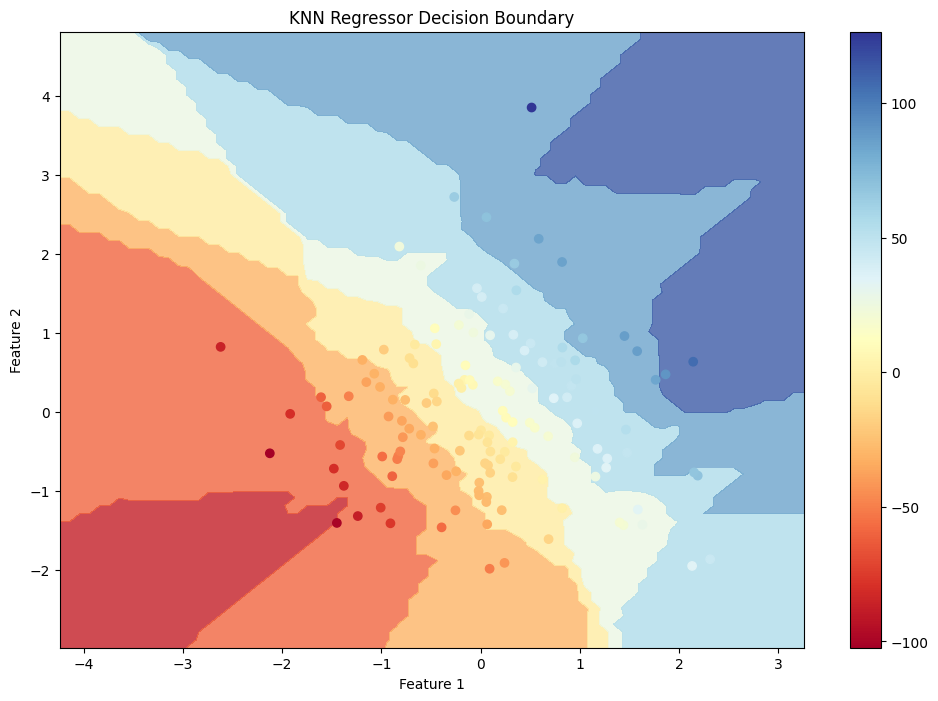

In [52]:
# Plot the results
plt.figure(figsize=(12, 8))

# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict for each point in the mesh
Z = knn_regressor.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

# Plot the training points
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu)
plt.colorbar(scatter)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Regressor Decision Boundary')
plt.show()

## Homework

Hands-on practice on DT and KNN by using sklearn APIs. The notebook should include data preprocessing, model training, evaluation and visualization. **Submit your notebook in PDF format to BS by the due date.**  

You may choose your dataset or use any below:

Iris
https://bit.ly/3VqeyM8

Penguins
https://bit.ly/3wXu4pE


Diabetes
https://bit.ly/data-pi-diabetes



In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import tree
from matplotlib.colors import ListedColormap


In [ ]:

# Load the Penguins dataset becase if we load the iris then it is the same thing as above
penguins = sns.load_dataset('penguins')
print("First 5 rows of the dataset:")
print(penguins.head())

# Drop rows with missing values cause they are jsut empty and will throw system off
penguins.dropna(inplace=True)

# Encode species labels
label_encoder = LabelEncoder()
penguins['species'] = label_encoder.fit_transform(penguins['species'])

# Select features and target of our choice
X = penguins[['bill_length_mm', 'bill_depth_mm']].values  # Using two features for visualization
y = penguins['species'].values

First 5 rows of the dataset:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [ ]:
# Split the datasets into x and y train & x and y test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Function to plot decision regions
def plot_decision_regions(X, y, classifier, title, test_idx=None, resolution=0.02):
    markers = ('o', 's', '^')
    colors = ('red', 'blue', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx],
                    label=f'Class {cl}', edgecolor='black')
    
    plt.xlabel('Bill Length (mm)')
    plt.ylabel('Bill Depth (mm)')
    plt.title(title)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()


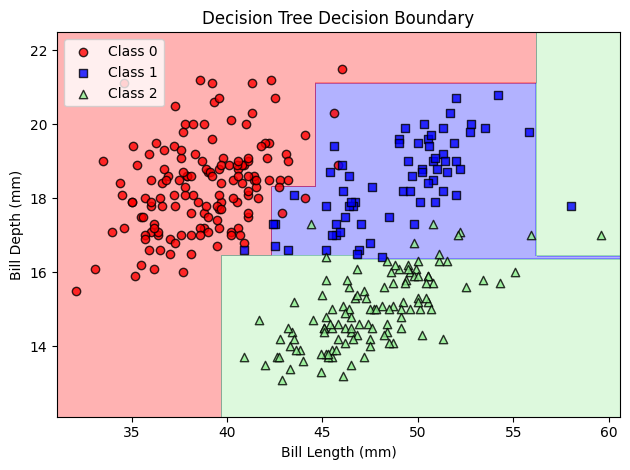

In [56]:
# Train Decision Tree model
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# Visualize decision boundary for Decision Tree
plot_decision_regions(np.vstack((X_train, X_test)), np.hstack((y_train, y_test)), classifier=tree_model, title='Decision Tree Decision Boundary')

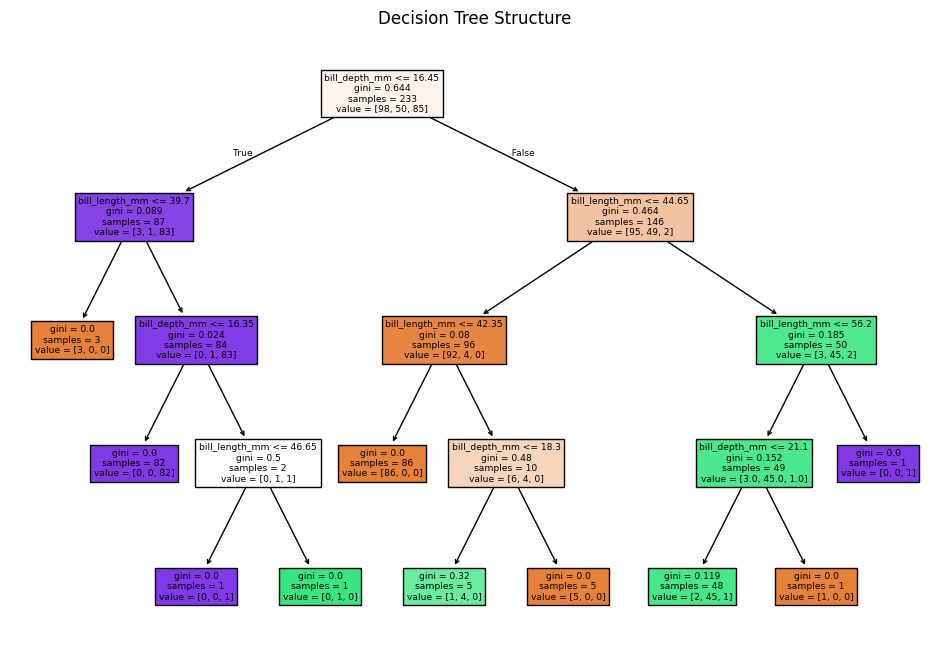

Decision Tree Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        48
           1       0.67      0.89      0.76        18
           2       0.97      0.82      0.89        34

    accuracy                           0.90       100
   macro avg       0.87      0.89      0.87       100
weighted avg       0.92      0.90      0.90       100



In [ ]:
# Visualize Decision Tree structure. See bellow tree strucutre
fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(tree_model, feature_names=['bill_length_mm', 'bill_depth_mm'], filled=True)
plt.title('Decision Tree Structure')
plt.show()

# Evaluate Decision Tree and get accuracy score for it
y_pred = tree_model.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

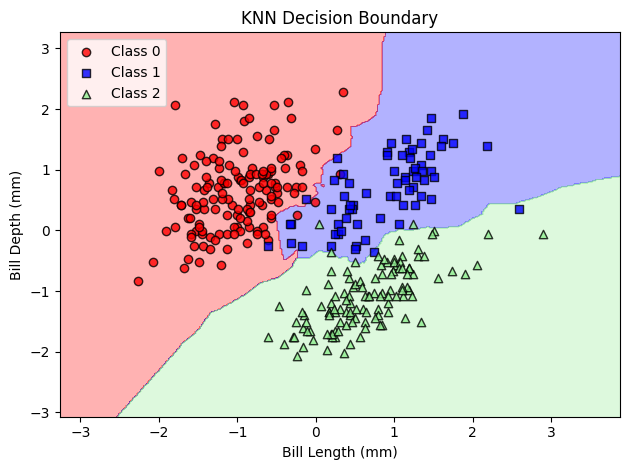

In [ ]:
# Standardize the data for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
knn.fit(X_train_scaled, y_train)

# Visualize decision boundary for KNN. See graph below.
plot_decision_regions(np.vstack((X_train_scaled, X_test_scaled)), np.hstack((y_train, y_test)), classifier=knn, title='KNN Decision Boundary')

In [ ]:
# The below code is used to evaluate KNN and it's precision
y_pred_knn = knn.predict(X_test_scaled)
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))




KNN Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        48
           1       0.80      0.89      0.84        18
           2       0.97      0.91      0.94        34

    accuracy                           0.94       100
   macro avg       0.92      0.93      0.92       100
weighted avg       0.94      0.94      0.94       100



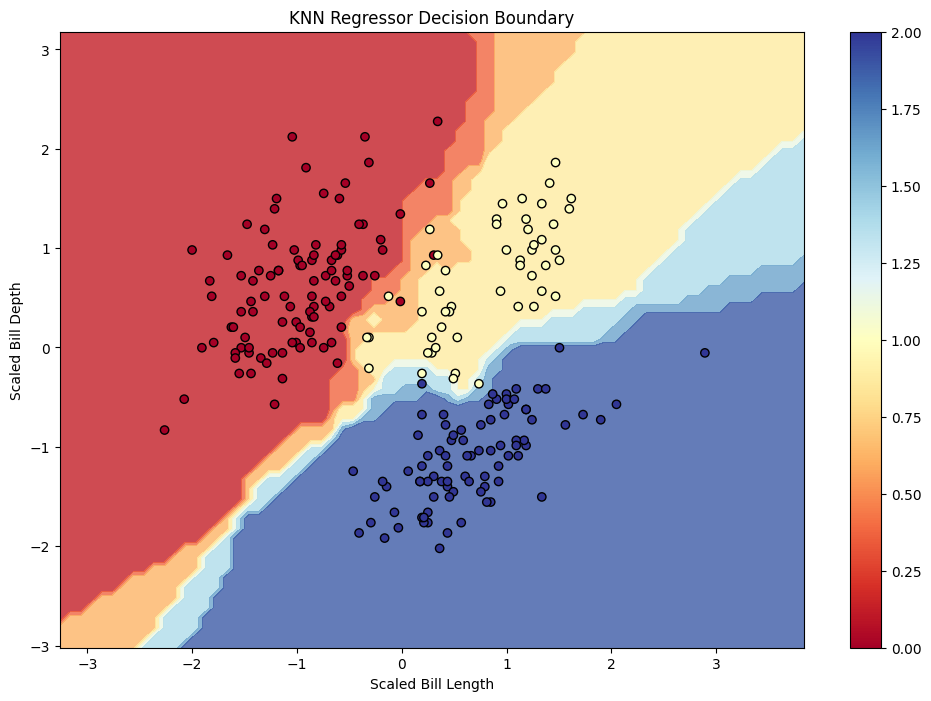

In [ ]:
# Train KNN Regressor for Decision Boundary Visualization
knn_regressor = KNeighborsRegressor(n_neighbors=3, metric='minkowski', p=2)
knn_regressor.fit(X_train_scaled, y_train)

# Plot the KNN Regressor for Decision Boundary
plt.figure(figsize=(12, 8))
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn_regressor.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='black')
plt.colorbar(scatter)
plt.xlabel('Scaled Bill Length')
plt.ylabel('Scaled Bill Depth')
plt.title('KNN Regressor Decision Boundary')
plt.show()